In [1]:
import numpy as np
import pandas as pd
import pegasus as pg
import json
import os
import pegasusio
from pegasusio import UnimodalData, MultimodalData
import matplotlib.pyplot as plt 
import scanpy as sc
from matplotlib.pyplot import rc_context
from matplotlib.gridspec import GridSpec
import matplotlib.colors as mcolors
import random
from utils.plot_utils import *
from utils.lists import *
import warnings
warnings.filterwarnings("ignore")

2024-09-15 18:22:11.312382: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-15 18:22:11.425370: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-15 18:22:11.428941: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-09-15 18:22:11.428956: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

# SD Fig. 2a,b

In [2]:
meta = pd.read_csv('/home/ah2428/ShareZhangLab/PTSD/ATAC/data/ATAC_FINAL_meta.csv',sep='\t')

In [4]:
meta['Int_Cluster'] = meta['Int_Cluster'].astype('category')
meta['Sample'] = meta['Sample'].astype('category')

In [5]:
meta['Int_Cluster'] = meta['Int_Cluster'].cat.rename_categories({'Ast':'AST','End':'END','Ex':'EXN','In':'IN','Mic':'MG','Oli':'OLG'})

In [7]:
meta['Int_Cluster'] = meta['Int_Cluster'].cat.reorder_categories(['EXN','IN','OLG','OPC','END','AST','MG'])

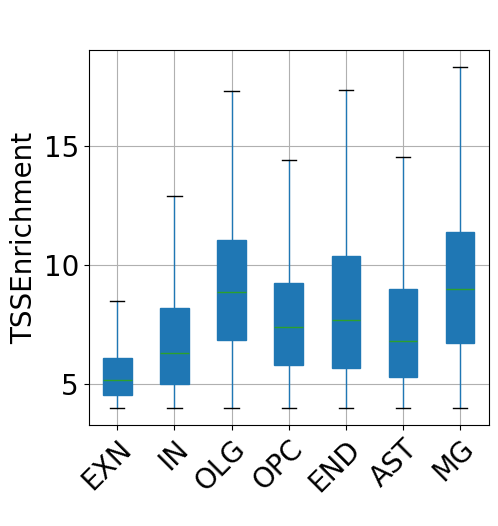

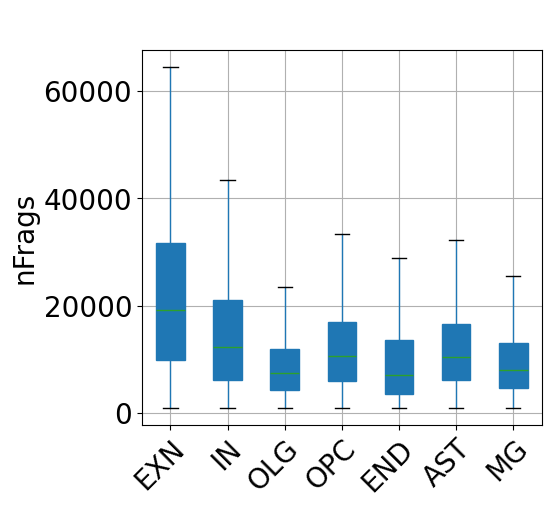

In [8]:
cols = ['TSSEnrichment','nFrags']
for c in cols:
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42
    bp = meta.boxplot(column=c,by=['Int_Cluster'],rot=45,showfliers=False,patch_artist=True,figsize=(5,5),fontsize=20)
    plt.xticks(ha='right',rotation_mode='anchor')
    plt.ylabel(c,fontsize=20)
    plt.xlabel(' ')
    plt.title(' ')
    plt.suptitle(' ')

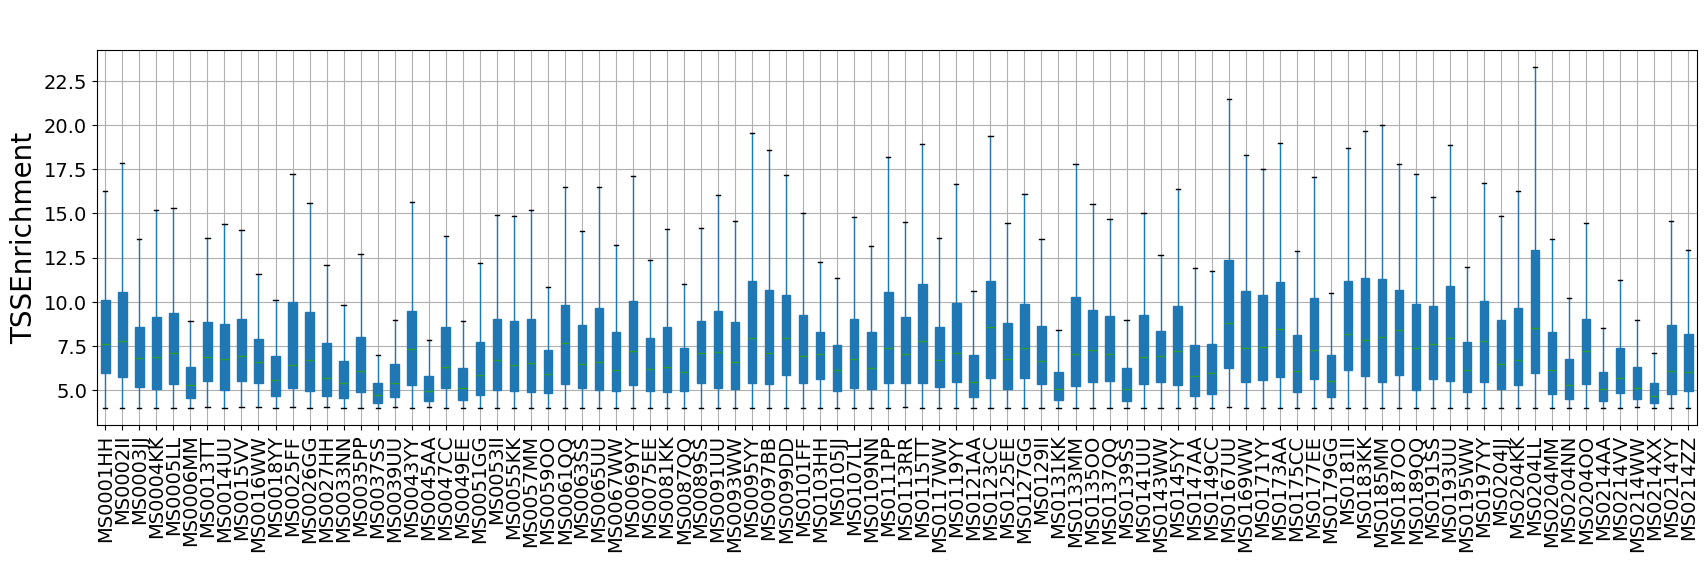

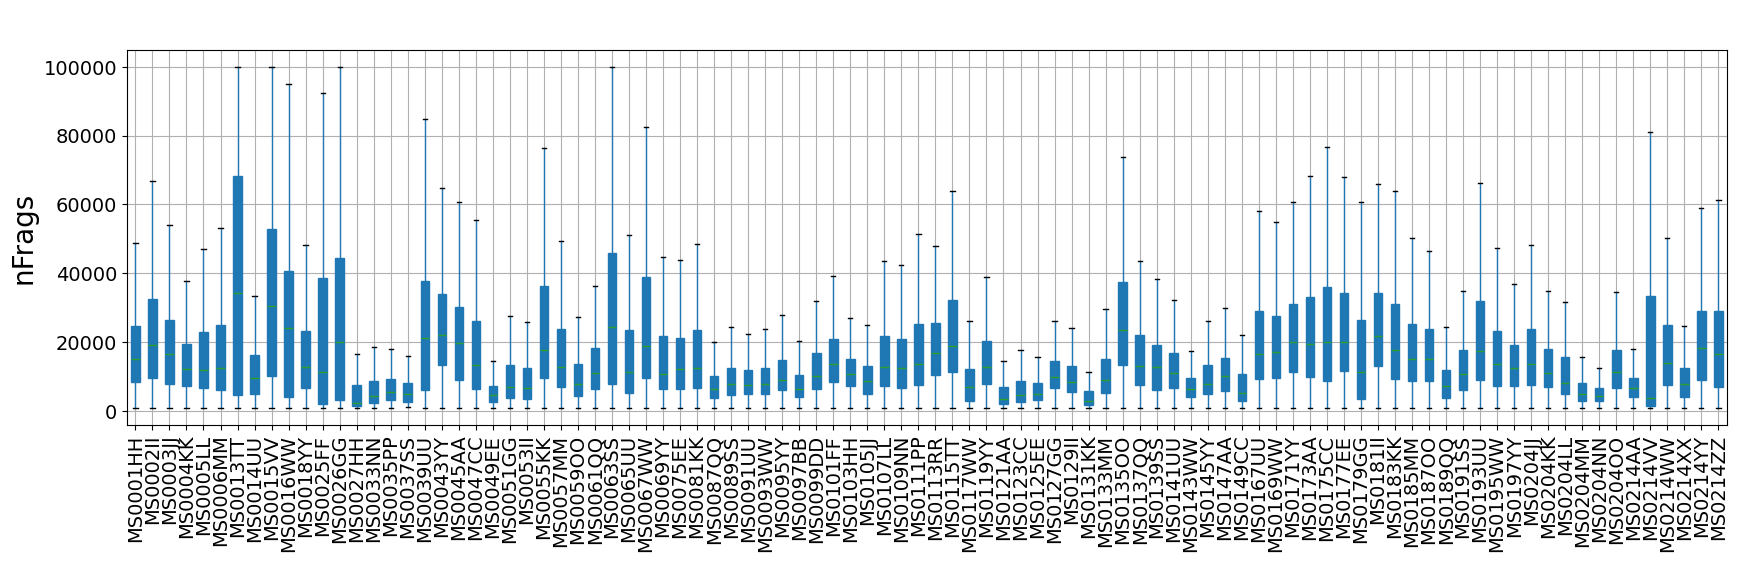

In [9]:
cols = ['TSSEnrichment','nFrags']
for c in cols:
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42
    bp = meta.boxplot(column=c,by=['Sample'],rot=90,showfliers=False,patch_artist=True,figsize=(20,5),fontsize=14)
    plt.xticks(ticks=np.arange(1,len(meta['Sample'].cat.categories)+1),labels=meta['Sample'].cat.categories)
    plt.ylabel(c,fontsize=20)
    plt.xlabel(' ')
    plt.title(' ')
    plt.suptitle(' ')

# SD Fig. 2c-h

In [10]:
atac_umap = pd.read_csv('/gpfs/gibbs/pi/girgenti/JZhang/commonData/PTSD/ATAC/data/atac_umap.txt',sep='\t')

In [11]:
ann = sc.AnnData(np.empty((meta.shape[0],2)))
ann.obs_names = atac_umap.index
ann.obsm['umap'] = np.array(atac_umap[['umap1','umap2']])

In [12]:
ann.obs['sample'] = meta['Sample'].values
ann.obs['race'] = meta['Race'].values
ann.obs['sex'] = meta['Sex'].values
ann.obs['agedeath'] = meta['AgeDeath'].values
ann.obs['rin'] = meta['RIN'].values
ann.obs['pmi'] = meta['PMI'].values

In [13]:
ann.obs['race'] = ann.obs['race'].astype('category')
ann.obs['sample'] = ann.obs['sample'].astype('category')
ann.obs['sex'] = ann.obs['sex'].astype('category')

In [14]:
colors = plot_colortable(mcolors.CSS4_COLORS,sort_colors=False)
colors = random.sample(colors,94)

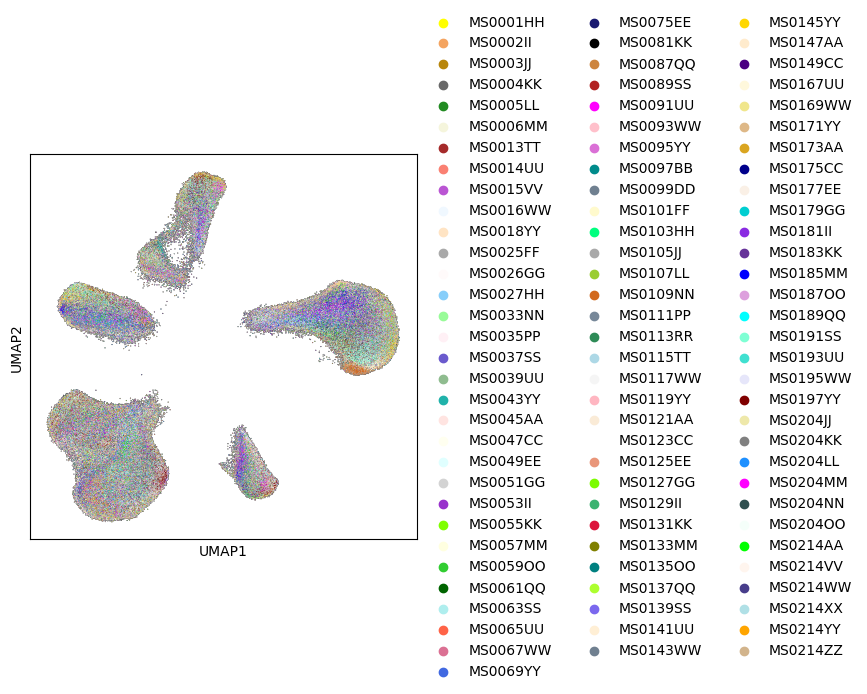

In [15]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(ann, color='sample', size=1, add_outline=True,palette=colors,save='_atac_sample.pdf',title=' ')

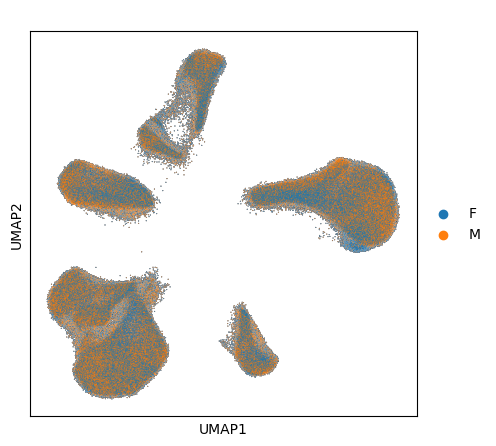

In [16]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(ann, color='sex', size=1, add_outline=True,save='_atac_sex.pdf',title=' ')

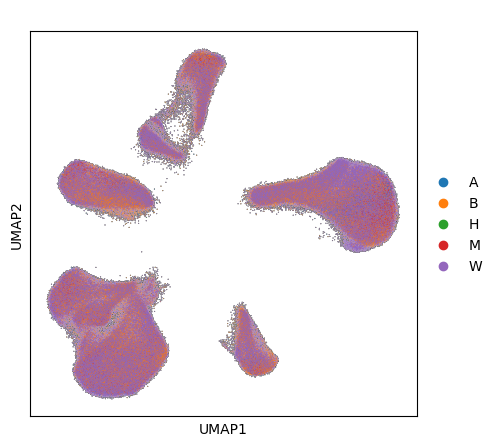

In [17]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(ann, color='race', size=1, add_outline=True,save='_atac_race.pdf',title=' ')

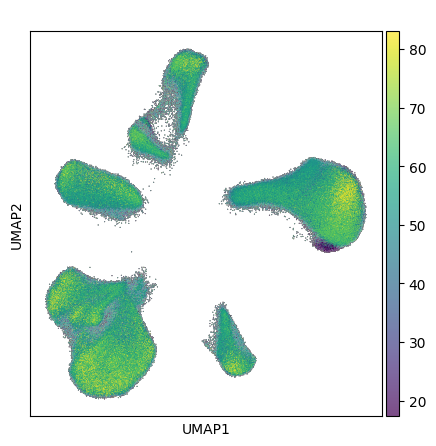

In [18]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(ann, color='agedeath', size=1, add_outline=True,save='_atac_agedeath.pdf',title=' ',color_map='viridis')

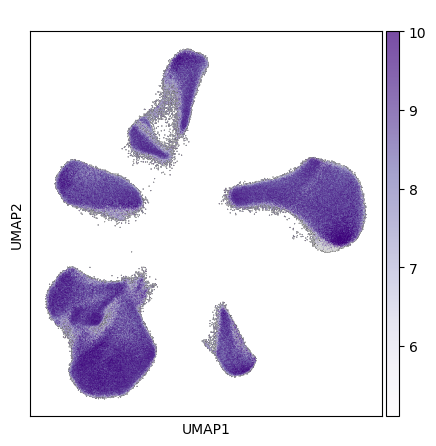

In [19]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(ann, color='rin', size=1, add_outline=True,save='_atac_rin.pdf',title=' ',color_map='Purples')

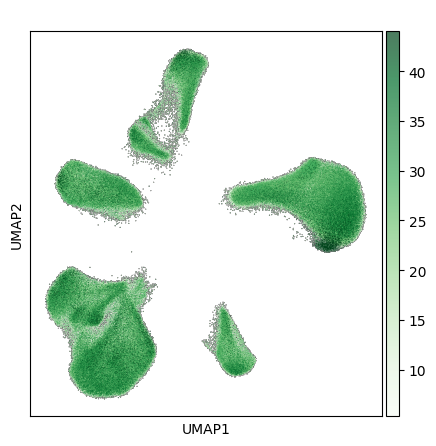

In [20]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(ann, color='pmi', size=1, add_outline=True,save='_atac_pmi.pdf',title=' ',color_map='Greens')

In [21]:
meta['Sample'] = meta['Sample'].astype('category')

In [22]:
name = 'Sample'
colname = 'Int_Cluster'

arr = []
for s in meta[colname].cat.categories:
    vals = list(meta[meta[colname]==s][name].value_counts()[sorted(meta[name].unique())]/meta[meta[colname]==s][name].value_counts()[sorted(meta[name].unique())].sum())
    arr.append(vals)
df = pd.DataFrame(arr)
df.insert(0, colname, meta[colname].cat.categories, True)
df.columns = [colname]+sorted(meta[name].unique())

Text(0.5, 0, ' ')

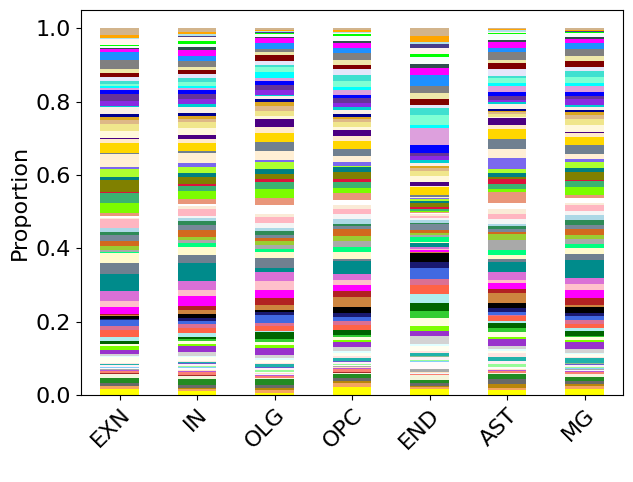

In [23]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
df.plot(colname,kind='bar',stacked=True,rot=45,fontsize=16,figsize=(7,5),legend=False,color=colors)
plt.xticks(np.arange(len(meta[colname].cat.categories)), meta[colname].cat.categories, ha='right',rotation_mode='anchor')
plt.ylabel('Proportion',fontsize=16)
plt.xlabel(' ')

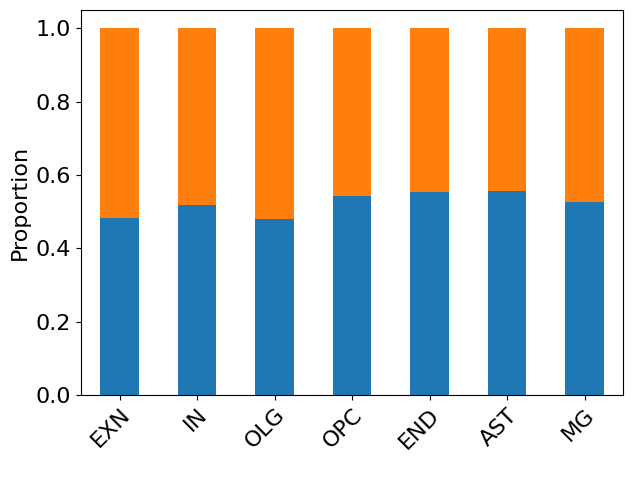

In [24]:
df = create_metadata_df(meta,'Int_Cluster','Sex')
metadata_barplot(df,'Int_Cluster',None,'/home/ah2428/palmer_scratch/figs/atac_sex_barplot.pdf')

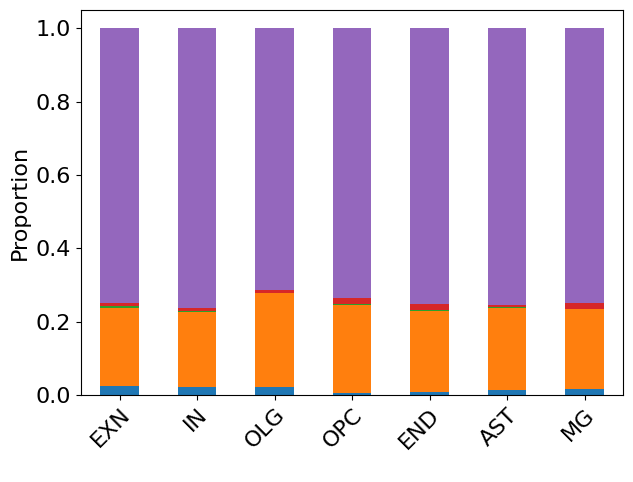

In [25]:
df = create_metadata_df(meta,'Int_Cluster','Race')
metadata_barplot(df,'Int_Cluster',None,'/home/ah2428/palmer_scratch/figs/atac_race_barplot.pdf')

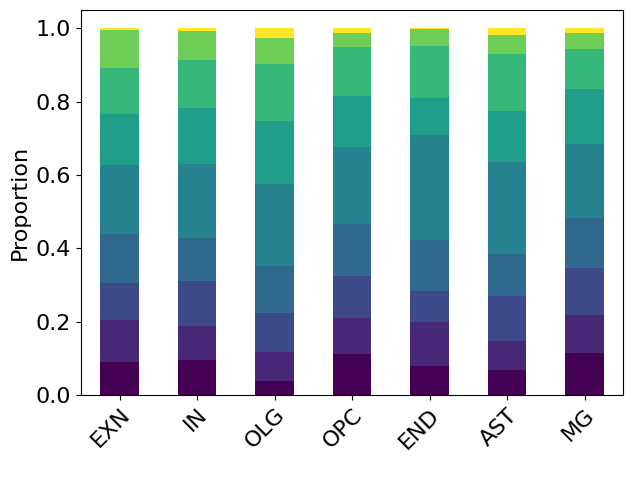

In [26]:
df = create_metadata_df_bins(meta,'Int_Cluster','AgeDeath')
metadata_barplot(df,'Int_Cluster','viridis','/home/ah2428/palmer_scratch/figs/atac_agedeath_barplot.pdf')

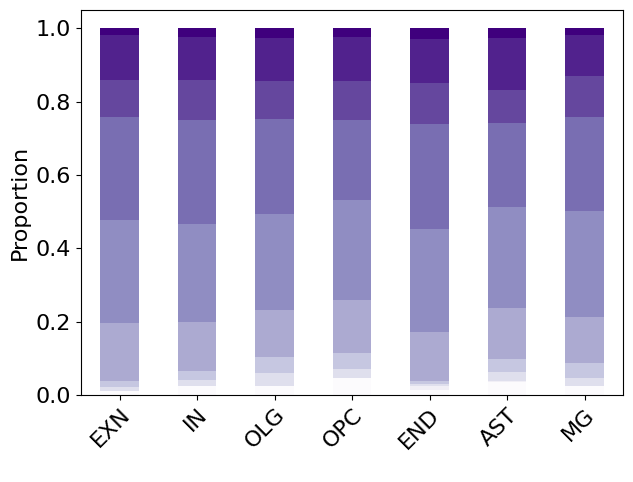

In [27]:
df = create_metadata_df_bins(meta,'Int_Cluster','RIN')
metadata_barplot(df,'Int_Cluster','Purples','/home/ah2428/palmer_scratch/figs/atac_rin_barplot.pdf')

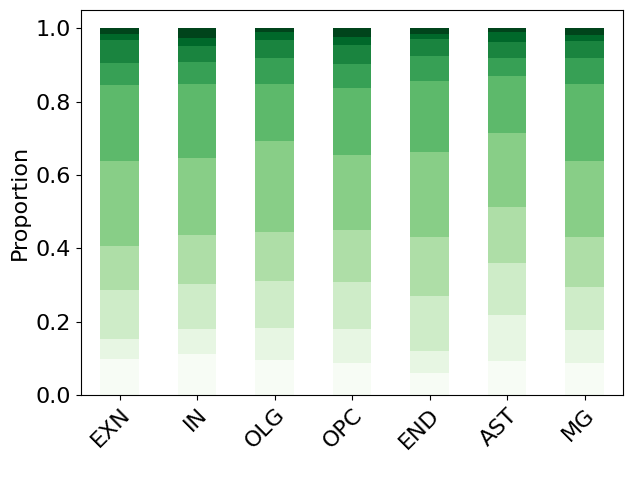

In [28]:
df = create_metadata_df_bins(meta,'Int_Cluster','PMI')
metadata_barplot(df,'Int_Cluster','Greens','/home/ah2428/palmer_scratch/figs/atac_pmi_barplot.pdf')